### **Student Details**
Name: Vishal Pattar  
Roll no: 43556  
Class: BE AIML  
Subject: Deep Learning for AI  
Assignment: 2

### **Problem Statement**
Implementing Feedforward neural networks with Keras and TensorFlow
- Import the necessary packages  
- Load the training and testing data (MNIST/CIFAR10)  
- Define the network architecture using Keras  
- Train the model using SGD  
- Evaluate the network  
- Plot the training loss and accuracy 

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
# Load the MNIST dataset and preprocess it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

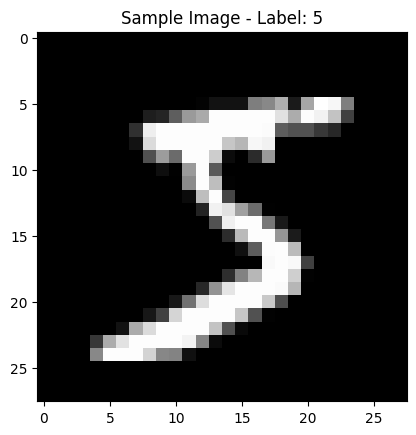

In [3]:
# Visualize a sample from the dataset
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Sample Image - Label: {y_train[0]}")
plt.show()

In [4]:
# Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten input images
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Compile the model using SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6459 - accuracy: 0.8382 - val_loss: 0.3575 - val_accuracy: 0.9040
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.9063 - val_loss: 0.2926 - val_accuracy: 0.9189
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2896 - accuracy: 0.9190 - val_loss: 0.2623 - val_accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9270 - val_loss: 0.2395 - val_accuracy: 0.9309
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2376 - accuracy: 0.9338 - val_loss: 0.2221 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9384 - val_loss: 0.2075 - val_accuracy: 0.9410
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2042 - accuracy: 0.9430 - val_loss: 0.1980 - val_accuracy:

In [7]:
# Evaluate the network on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.1659 - accuracy: 0.9522
Test Loss: 0.166
Test Accuracy: 0.952


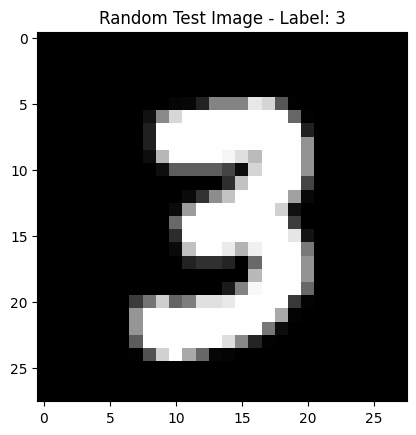

313/313 [==============================] - 1s 4ms/step
Predicted Label: 3


In [8]:
# Visualize a random test sample and its predicted label
n = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[n], cmap="gray")
plt.title(f"Random Test Image - Label: {y_test[n]}")
plt.show()

# Predict the label for the random test sample
predicted_value = model.predict(x_test)
print(f"Predicted Label: {predicted_value[n].argmax()}")

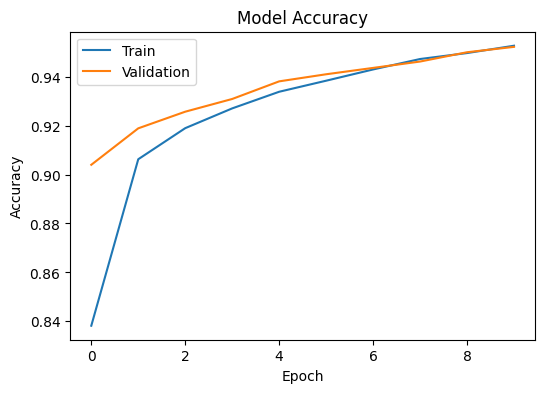

In [9]:
# Plot training accuracy and loss
plt.figure(figsize=(6, 4))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

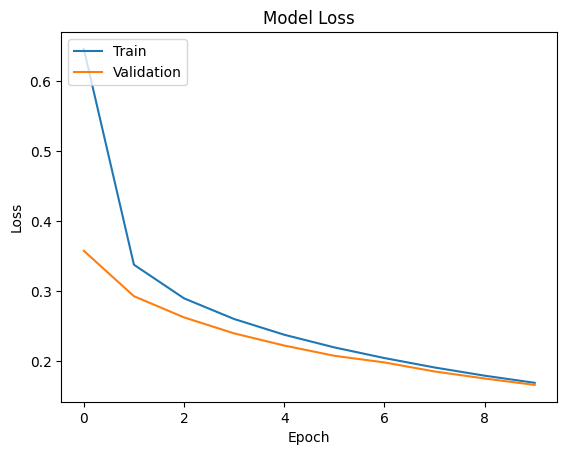

In [10]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>